In [125]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [2]:
os.chdir("/home/mosouwer/Documents/Fake-News-Classifier-master/fake-news")

In [62]:
data=pd.read_csv("news_data.csv")

In [63]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [64]:
data.shape

(6335, 4)

In [65]:
data.dropna(inplace=True)

In [66]:
data.shape

(6335, 4)

In [75]:
msg=data.copy()

In [76]:
msg.reset_index(inplace=True)

In [85]:
msg['label']=msg['label'].replace("REAL",1)
msg['label']=msg['label'].replace("FAKE",0)

In [86]:
msg.head()

,index,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [92]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

lemma=WordNetLemmatizer()
corpus=[]
for i in range(len(msg)):
    review=re.sub('[^a-zA-Z]', " ",msg['title'][i])
    review=review.lower()
    review=review.split()
    review=[lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english')) ]
    review=' '.join(review)
    corpus.append(review)

In [94]:
corpus[0]

'smell hillary fear'

In [95]:
#Applying count vectorizer
#creating bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
x=cv.fit_transform(corpus).toarray()

In [96]:
x.shape

(6335, 5000)

In [97]:
cv.get_feature_names()[:10]

['abandon',
 'abc',
 'abdullah',
 'abedin',
 'abedin weiner',
 'abortion',
 'absolutely',
 'abstains',
 'abstains un',
 'abstains un vote']

In [98]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [99]:
df=pd.DataFrame(x,columns=cv.get_feature_names())
df.head()

,abandon,abc,abdullah,abedin,abedin weiner,abortion,absolutely,abstains,abstains un,abstains un vote,...,young,young woman,youth,youtube,zero,zika,zika scaremongering,zika virus,zionist,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
y=msg['label']

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [107]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB

In [108]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [109]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:  0.819258089976322
Confusion matrix, without normalization


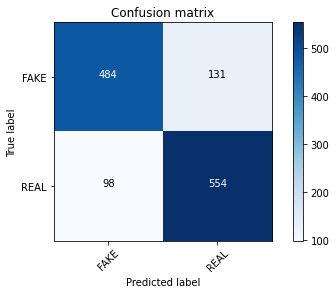

In [115]:
mnb.fit(X_train, Y_train)
pred = mnb.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy: ",score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [118]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier()

accuracy: 0.7924230465666929
Confusion matrix, without normalization


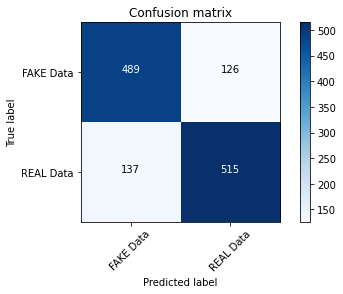

In [121]:
linear_clf.fit(X_train,Y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:",score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with HyperParameter

In [122]:
mnb=MultinomialNB(alpha=0.1)

In [127]:
prv_score=0
for alpha in np.arange(0,1,0.1):
    sub_mnb=MultinomialNB(alpha=alpha)
    sub_mnb.fit(X_train,Y_train)
    pred=sub_mnb.predict(X_test)
    score=metrics.accuracy_score(Y_test,pred)
    print("Alpha: {}, Score: {}".format(alpha,score))
        

/root/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score: 0.8018942383583267
Alpha: 0.1, Score: 0.819258089976322
Alpha: 0.2, Score: 0.8200473559589582
Alpha: 0.30000000000000004, Score: 0.8216258879242304
Alpha: 0.4, Score: 0.823993685872139
Alpha: 0.5, Score: 0.8224151539068666
Alpha: 0.6000000000000001, Score: 0.8224151539068666
Alpha: 0.7000000000000001, Score: 0.819258089976322
Alpha: 0.8, Score: 0.8176795580110497
Alpha: 0.9, Score: 0.8176795580110497


In [128]:
sub_mnb=MultinomialNB(alpha=0.4)
sub_mnb.fit(X_train,Y_train)
pred=sub_mnb.predict(X_test)
score=metrics.accuracy_score(Y_test,pred)
print("Alpha: {}, Score: {}".format(alpha,score))

Alpha: 0.9, Score: 0.823993685872139


In [130]:
sub_mnb.coef_[0]

array([ -9.59793242,  -9.05893592,  -8.71062922, ..., -10.85069539,
       -10.85069539, -10.85069539])

In [140]:
#most real
sorted(zip(sub_mnb.coef_[0],cv.get_feature_names()),reverse=True)[:20]

[(-3.7011710926254935, 'trump'),
 (-4.146281032080898, 'clinton'),
 (-4.464658172995282, 'obama'),
 (-4.674828116939244, 'gop'),
 (-4.869281175790524, 'hillary'),
 (-4.92110624365511, 'donald'),
 (-4.93449332443757, 'donald trump'),
 (-5.048577011667942, 'debate'),
 (-5.110902474865771, 'republican'),
 (-5.1860003010968505, 'new'),
 (-5.230294521327854, 'hillary clinton'),
 (-5.257844473096085, 'say'),
 (-5.276642019063588, 'sander'),
 (-5.397513309936053, 'house'),
 (-5.441283972991381, 'cruz'),
 (-5.46390937250936, 'state'),
 (-5.4870585543763255, 'campaign'),
 (-5.624948713331803, 'iran'),
 (-5.680211392006853, 'deal'),
 (-5.709031830542345, 'white')]

In [142]:
#most fake

sorted(zip(sub_mnb.coef_[0],cv.get_feature_names()))[:5000]

[(-10.850695387045004, 'abedin'),
 (-10.850695387045004, 'abedin weiner'),
 (-10.850695387045004, 'abstains'),
 (-10.850695387045004, 'abstains un'),
 (-10.850695387045004, 'abstains un vote'),
 (-10.850695387045004, 'access pipeline'),
 (-10.850695387045004, 'achievement'),
 (-10.850695387045004, 'acquitted'),
 (-10.850695387045004, 'across country'),
 (-10.850695387045004, 'active'),
 (-10.850695387045004, 'adhd'),
 (-10.850695387045004, 'admits zika'),
 (-10.850695387045004, 'admitted'),
 (-10.850695387045004, 'advance mosul'),
 (-10.850695387045004, 'advert'),
 (-10.850695387045004, 'advised'),
 (-10.850695387045004, 'ag lynch'),
 (-10.850695387045004, 'ag lynch told'),
 (-10.850695387045004, 'agent'),
 (-10.850695387045004, 'aggressively'),
 (-10.850695387045004, 'air'),
 (-10.850695387045004, 'airstrikes yemen'),
 (-10.850695387045004, 'akbar'),
 (-10.850695387045004, 'al nusra'),
 (-10.850695387045004, 'aleppo'),
 (-10.850695387045004, 'alien'),
 (-10.850695387045004, 'alien mus